In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split

In [2]:
'''from google.colab import files
files.upload()'''


'from google.colab import files\nfiles.upload()'

In [71]:
df= pd.read_csv("/content/train.csv" )
df.head(5)

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0


In [72]:
df.shape

(45528, 19)

In [73]:
df['total_credit used']=(df['credit_limit']*(df['credit_limit_used(%)']/100))
df['total credit left']=(df['credit_limit']-df['total_credit used'])

In [74]:
df.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default,total_credit used,total credit left
0,CST_115179,ita Bose,46,F,N,Y,0.0,107934.04,612.0,Unknown,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1,13644.3789,5046.5511
1,CST_121920,Alper Jonathan,29,M,N,Y,0.0,109862.62,2771.0,Laborers,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0,19627.4988,18117.6912
2,CST_109330,Umesh Desai,37,M,N,Y,0.0,230153.17,204.0,Laborers,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0,17887.2948,23711.0652
3,CST_128288,Rie,39,F,N,Y,0.0,122325.82,11941.0,Core staff,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0,6525.5520,26102.2080
4,CST_151355,McCool,46,M,Y,Y,0.0,387286.00,1459.0,Core staff,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0,39712.9800,13237.6600


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


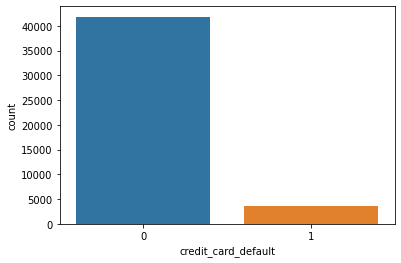

In [75]:
sns.countplot(df['credit_card_default'])


In [76]:
df['occupation_type'].value_counts()

Unknown                  14299
Laborers                  8134
Sales staff               4725
Core staff                4062
Managers                  3168
Drivers                   2747
High skill tech staff     1682
Accountants               1474
Medicine staff            1275
Security staff            1025
Cooking staff              902
Cleaning staff             665
Private service staff      387
Low-skill Laborers         336
Waiters/barmen staff       203
Secretaries                199
Realty agents              101
HR staff                    78
IT staff                    66
Name: occupation_type, dtype: int64

In [78]:
df.isnull().all()

customer_id                False
name                       False
age                        False
gender                     False
owns_car                   False
owns_house                 False
no_of_children             False
net_yearly_income          False
no_of_days_employed        False
occupation_type            False
total_family_members       False
migrant_worker             False
yearly_debt_payments       False
credit_limit               False
credit_limit_used(%)       False
credit_score               False
prev_defaults              False
default_in_last_6months    False
credit_card_default        False
total_credit used          False
total credit left          False
dtype: bool

In [79]:

df= df.drop(labels=['customer_id','name','occupation_type'] ,axis=1)

In [80]:
df.head(-20)

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default,total_credit used,total credit left
0,46,F,N,Y,0.0,107934.04,612.0,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1,13644.3789,5046.5511
1,29,M,N,Y,0.0,109862.62,2771.0,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0,19627.4988,18117.6912
2,37,M,N,Y,0.0,230153.17,204.0,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0,17887.2948,23711.0652
3,39,F,N,Y,0.0,122325.82,11941.0,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0,6525.5520,26102.2080
4,46,M,Y,Y,0.0,387286.00,1459.0,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0,39712.9800,13237.6600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45503,32,F,N,Y,0.0,37874.35,365251.0,2.0,0.0,6608.36,7248.34,49,654.0,0,0,0,3551.6866,3696.6534
45504,52,F,N,Y,1.0,103653.93,2172.0,2.0,0.0,24681.20,32732.85,31,926.0,0,0,0,10147.1835,22585.6665
45505,34,F,N,Y,1.0,121948.30,2098.0,2.0,0.0,11043.08,33119.93,18,912.0,0,0,0,5961.5874,27158.3426
45506,55,F,N,Y,0.0,119513.98,7220.0,2.0,0.0,46865.75,44513.68,98,682.0,0,0,1,43623.4064,890.2736


In [81]:
df = df.replace('N',0)
df = df.replace('Y',1)
df = df.replace('F',0)
df = df.replace('M',1)
df = df.replace('XNA',0)
df.head()

 




,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default,total_credit used,total credit left
0,46,0,0.0,1,0.0,107934.04,612.0,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1,13644.3789,5046.5511
1,29,1,0.0,1,0.0,109862.62,2771.0,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0,19627.4988,18117.6912
2,37,1,0.0,1,0.0,230153.17,204.0,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0,17887.2948,23711.0652
3,39,0,0.0,1,0.0,122325.82,11941.0,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0,6525.5520,26102.2080
4,46,1,1.0,1,0.0,387286.00,1459.0,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0,39712.9800,13237.6600


In [82]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.replace(np.nan,0)

In [83]:
np.any(np.isnan(df))

False

In [84]:
np.all(np.isfinite(df))

True

In [85]:
def normalize(df):
  df =df.copy()
  for f_name in df.columns:
    max_value = df[f_name].max()
    min_value = df[f_name].min()
    df[f_name] = (df[f_name] - min_value)/(min_value - max_value)
    return df
df = normalize(df)

In [86]:
df.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default,total_credit used,total credit left
0,-0.71875,0,0.0,1,0.0,107934.04,612.0,1.0,1.0,33070.28,18690.93,73,544.0,2,1,1,13644.3789,5046.5511
1,-0.18750,1,0.0,1,0.0,109862.62,2771.0,2.0,0.0,15329.53,37745.19,52,857.0,0,0,0,19627.4988,18117.6912
2,-0.43750,1,0.0,1,0.0,230153.17,204.0,2.0,0.0,48416.60,41598.36,43,650.0,0,0,0,17887.2948,23711.0652
3,-0.50000,0,0.0,1,0.0,122325.82,11941.0,2.0,0.0,22574.36,32627.76,20,754.0,0,0,0,6525.5520,26102.2080
4,-0.71875,1,1.0,1,0.0,387286.00,1459.0,1.0,0.0,38282.95,52950.64,75,927.0,0,0,0,39712.9800,13237.6600


In [87]:
df.corr()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,credit_card_default,total_credit used,total credit left
age,1.000000,0.004315,0.006826,-0.002367,0.008340,-0.004079,-0.000173,0.010732,0.005576,0.002453,-0.004473,0.005529,-0.001114,-0.001393,0.001406,0.000983,-0.004722,-0.002697
gender,0.004315,1.000000,0.342915,-0.041853,0.055356,0.028120,-0.153673,0.087049,0.134929,0.081477,0.026988,0.019465,-0.032490,0.049822,0.045886,0.057579,0.017932,0.053800
owns_car,0.006826,0.342915,1.000000,0.005821,0.103379,0.031740,-0.150069,0.148283,0.094016,0.133578,0.030387,-0.002469,0.008357,-0.011274,-0.015965,-0.017104,0.017765,0.069197
owns_house,-0.002367,-0.041853,0.005821,1.000000,-0.004777,0.003015,0.061485,0.004038,-0.025227,-0.003913,0.003172,0.001453,0.002317,0.003068,-0.002221,-0.002693,0.003528,0.001277
no_of_children,0.008340,0.055356,0.103379,-0.004777,1.000000,0.009006,-0.238703,0.865669,0.070504,0.027205,0.009427,0.006783,-0.014493,0.019031,0.021382,0.023262,0.007507,0.014375
net_yearly_income,-0.004079,0.028120,0.031740,0.003015,0.009006,1.000000,-0.029315,0.010517,0.001501,0.076774,0.993378,0.002696,-0.009667,-0.004696,0.015092,0.011508,0.986335,0.820693
no_of_days_employed,-0.000173,-0.153673,-0.150069,0.061485,-0.238703,-0.029315,1.000000,-0.227085,-0.218130,-0.102668,-0.027692,-0.018517,0.035414,-0.035930,-0.033938,-0.046660,-0.020605,-0.047370
total_family_members,0.010732,0.087049,0.148283,0.004038,0.865669,0.010517,-0.227085,1.000000,0.080247,0.077334,0.010349,0.002587,-0.010351,0.010150,0.013616,0.010640,0.008002,0.016628
migrant_worker,0.005576,0.134929,0.094016,-0.025227,0.070504,0.001501,-0.218130,0.080247,1.000000,0.014025,-0.000095,0.010352,-0.013022,0.029219,0.030003,0.034018,0.000769,-0.003150
yearly_debt_payments,0.002453,0.081477,0.133578,-0.003913,0.027205,0.076774,-0.102668,0.077334,0.014025,1.000000,0.074969,-0.006302,0.006004,-0.012416,-0.011603,-0.013071,0.045531,0.164661


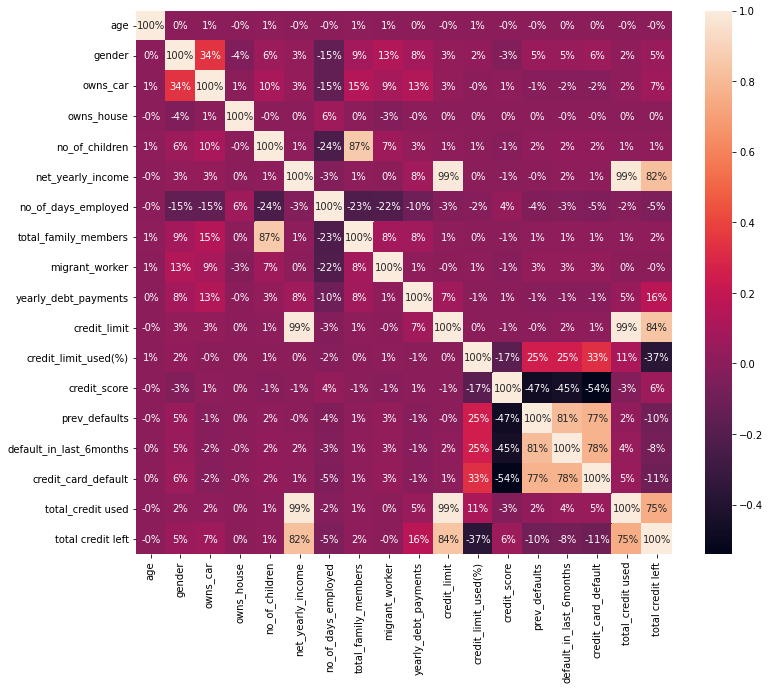

In [88]:
plt.subplots(figsize=(12,10))
sns.heatmap(df.corr(),annot= True ,fmt='.0%')

In [89]:
df['defaulter']=df['credit_card_default']
df = df.drop(labels='credit_card_default' ,axis=1)

In [90]:
df.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,total_credit used,total credit left,defaulter
0,-0.71875,0,0.0,1,0.0,107934.04,612.0,1.0,1.0,33070.28,18690.93,73,544.0,2,1,13644.3789,5046.5511,1
1,-0.18750,1,0.0,1,0.0,109862.62,2771.0,2.0,0.0,15329.53,37745.19,52,857.0,0,0,19627.4988,18117.6912,0
2,-0.43750,1,0.0,1,0.0,230153.17,204.0,2.0,0.0,48416.60,41598.36,43,650.0,0,0,17887.2948,23711.0652,0
3,-0.50000,0,0.0,1,0.0,122325.82,11941.0,2.0,0.0,22574.36,32627.76,20,754.0,0,0,6525.5520,26102.2080,0
4,-0.71875,1,1.0,1,0.0,387286.00,1459.0,1.0,0.0,38282.95,52950.64,75,927.0,0,0,39712.9800,13237.6600,0


In [91]:
df.shape

(45528, 18)

In [92]:
x = df.iloc[:,0:17].values     # splitting all the rows from column 0 to 6 in x
y = df.iloc[:,-1].values       #splitting attrtion column in y       

print('x{}'.format(x))
print('================================================')
print('y:{}'.format(y))

x[[-7.18750000e-01  0.00000000e+00  0.00000000e+00 ...  1.00000000e+00
   1.36443789e+04  5.04655110e+03]
 [-1.87500000e-01  1.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   1.96274988e+04  1.81176912e+04]
 [-4.37500000e-01  1.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   1.78872948e+04  2.37110652e+04]
 ...
 [-1.25000000e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   3.86224418e+04  4.53393882e+04]
 [-2.81250000e-01  1.00000000e+00  1.00000000e+00 ...  0.00000000e+00
   2.34956224e+04  2.04309760e+03]
 [-4.68750000e-01  1.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   9.52399760e+03  2.71067624e+04]]
y:[1 0 0 ... 0 0 0]


In [93]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.20,train_size= 0.80, random_state= 0 )

In [94]:
print('Number of data points in train data:', x_train.shape[0])
print('Number of data points in test data:', x_test.shape[0])
print('Number of data points in cross validation data:', y_test.shape[0])

Number of data points in train data: 36422
Number of data points in test data: 9106
Number of data points in cross validation data: 9106


In [95]:

from xgboost import XGBClassifier
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV

In [96]:
oversample= SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)

In [97]:
print('Number of data points in train data:', x_train.shape[0])
print('Number of data points in test data:', x_test.shape[0])
print('Number of data points in cross validation data:', y_test.shape[0])

Number of data points in train data: 66918
Number of data points in test data: 9106
Number of data points in cross validation data: 9106


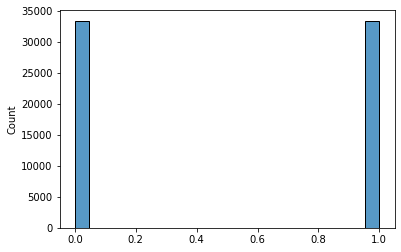

In [98]:
sns.histplot(y_train)

In [104]:

x_cfl=XGBClassifier(n_estimators=500,max_depth=3,learning_rate=0.10,colsample_bytree=0.1)
x_cfl.fit(x_train,y_train,verbose=True)

y_pred = x_cfl.predict(x_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
f1=f1_score
score = f1(y_test,y_pred, average='macro')

print(score)

0.9330115148517565


In [100]:
prams={
      'n_estimators':[400,500,600,700,800],
    'learning_rate':[0.01,0.03,0.05,0.1,0.15],
     'max_depth':[3,5,10]
    
}

random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl.fit(x_train,y_train)
print (random_cfl.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.05}


In [ ]:
print(y_pred)
print(y_test)

In [ ]:
from google.colab import files
files.upload()

In [105]:
test= pd.read_csv('/content/test.csv')
test.head()


,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,CST_142525,Siva,52,F,Y,N,0.0,232640.53,998.0,Unknown,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,CST_129215,Scott,48,F,N,N,1.0,284396.79,1338.0,Unknown,3.0,0.0,57479.99,68998.72,70,806.0,0,0
2,CST_138443,Victoria,50,F,N,N,1.0,149419.28,1210.0,Unknown,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,CST_123812,John McCrank,30,F,N,N,1.0,160437.54,503.0,Laborers,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,CST_144450,Martinne,52,M,N,Y,0.0,233480.37,157.0,Laborers,2.0,1.0,54213.72,82331.82,82,613.0,1,1


In [106]:
test= test.drop(labels =['customer_id','name','occupation_type'],axis=1)

In [107]:
test['total_credit used']=(test['credit_limit']*(test['credit_limit_used(%)']/100))
test['total credit left']=(test['credit_limit']-test['total_credit used'])


test.head()


,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,total_credit used,total credit left
0,52,F,Y,N,0.0,232640.53,998.0,2.0,0.0,14406.73,26524.40,4,779.0,0,0,1060.9760,25463.4240
1,48,F,N,N,1.0,284396.79,1338.0,3.0,0.0,57479.99,68998.72,70,806.0,0,0,48299.1040,20699.6160
2,50,F,N,N,1.0,149419.28,1210.0,3.0,0.0,21611.01,25187.80,71,528.0,2,0,17883.3380,7304.4620
3,30,F,N,N,1.0,160437.54,503.0,2.0,1.0,28990.76,29179.39,9,815.0,0,0,2626.1451,26553.2449
4,52,M,N,Y,0.0,233480.37,157.0,2.0,1.0,54213.72,82331.82,82,613.0,1,1,67512.0924,14819.7276


In [108]:
test = test.replace('F',0)
test = test.replace('M',1)
test = test.replace('XNA',0)
test['gender'].value_counts()


0    7444
1    3939
Name: gender, dtype: int64

In [109]:
test= test.replace('N',0)
test= test.replace('Y',1)
test.head()

,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months,total_credit used,total credit left
0,52,0,1.0,0,0.0,232640.53,998.0,2.0,0.0,14406.73,26524.40,4,779.0,0,0,1060.9760,25463.4240
1,48,0,0.0,0,1.0,284396.79,1338.0,3.0,0.0,57479.99,68998.72,70,806.0,0,0,48299.1040,20699.6160
2,50,0,0.0,0,1.0,149419.28,1210.0,3.0,0.0,21611.01,25187.80,71,528.0,2,0,17883.3380,7304.4620
3,30,0,0.0,0,1.0,160437.54,503.0,2.0,1.0,28990.76,29179.39,9,815.0,0,0,2626.1451,26553.2449
4,52,1,0.0,1,0.0,233480.37,157.0,2.0,1.0,54213.72,82331.82,82,613.0,1,1,67512.0924,14819.7276


In [110]:
test= test.replace([np.inf, -np.inf], np.nan)
test= test.replace(np.nan, 0)
np.all(np.isfinite(test))

True

In [111]:
test = normalize(test)


In [112]:
test.shape

(11383, 17)

In [113]:
T=test.iloc[:,0:17].values
print(T)

[[-9.06250000e-01  0.00000000e+00  1.00000000e+00 ...  0.00000000e+00
   1.06097600e+03  2.54634240e+04]
 [-7.81250000e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   4.82991040e+04  2.06996160e+04]
 [-8.43750000e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   1.78833380e+04  7.30446200e+03]
 ...
 [-1.25000000e-01  1.00000000e+00  1.00000000e+00 ...  0.00000000e+00
   4.64557632e+04  2.28811968e+04]
 [-4.06250000e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   4.57436510e+03  2.23336649e+04]
 [-6.87500000e-01  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   1.66860032e+04  9.38587680e+03]]


In [114]:
T.shape

(11383, 17)

In [117]:

# make predictions for test data
y_test =x_cfl.predict(T)

print(y_test)

[0 0 1 ... 0 0 0]


In [118]:
Test2 = pd.read_csv('/content/test.csv')
Test2.head()

,customer_id,name,age,gender,owns_car,owns_house,no_of_children,net_yearly_income,no_of_days_employed,occupation_type,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,default_in_last_6months
0,CST_142525,Siva,52,F,Y,N,0.0,232640.53,998.0,Unknown,2.0,0.0,14406.73,26524.40,4,779.0,0,0
1,CST_129215,Scott,48,F,N,N,1.0,284396.79,1338.0,Unknown,3.0,0.0,57479.99,68998.72,70,806.0,0,0
2,CST_138443,Victoria,50,F,N,N,1.0,149419.28,1210.0,Unknown,3.0,0.0,21611.01,25187.80,71,528.0,2,0
3,CST_123812,John McCrank,30,F,N,N,1.0,160437.54,503.0,Laborers,2.0,1.0,28990.76,29179.39,9,815.0,0,0
4,CST_144450,Martinne,52,M,N,Y,0.0,233480.37,157.0,Laborers,2.0,1.0,54213.72,82331.82,82,613.0,1,1


In [119]:
submission = pd.DataFrame(columns=['customer_id','credit_card_default'] )
submission['credit_card_default'] = y_test
submission['customer_id'] = Test2['customer_id']

In [120]:
submission.head()

,customer_id,credit_card_default
0,CST_142525,0
1,CST_129215,0
2,CST_138443,1
3,CST_123812,0
4,CST_144450,1


In [121]:
submission.to_csv('submission26.csv')